In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))


1.ipynb
dataset.zip
globalterrorismdb_0616dist.csv
Untitled.ipynb



In [2]:
data=pd.read_csv('./globalterrorismdb_0616dist.csv',encoding='ISO-8859-1')

/home/aditya/cv4/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156772 entries, 0 to 156771
Columns: 137 entries, eventid to related
dtypes: float64(55), int64(24), object(58)
memory usage: 163.9+ MB


In [5]:
data.corr().head()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.010742,0.015943,0.088933,-0.144918,0.391129,0.172221,0.553091,0.029533,...,-0.002849,-0.000461,-0.169650,-0.172339,0.292161,-0.228536,-0.234006,-0.231593,-0.077012,-0.266880
iyear,0.999996,1.000000,0.008121,0.015863,0.088923,-0.144894,0.391142,0.172276,0.553111,0.029520,...,-0.002849,-0.000810,-0.169685,-0.172205,0.292178,-0.228479,-0.234008,-0.231594,-0.077005,-0.266873
imonth,0.010742,0.008121,1.000000,0.005991,0.001373,-0.010570,0.000373,-0.015947,-0.002298,0.002434,...,-0.001223,0.066517,0.003506,-0.026813,0.016789,-0.025079,-0.003909,-0.003617,-0.003490,-0.007883
iday,0.015943,0.015863,0.005991,1.000000,-0.005025,0.005227,0.008863,0.001889,0.011761,-0.011166,...,0.014616,0.006333,0.005583,0.003025,0.002198,0.006538,-0.007560,-0.007982,-0.002237,-0.007191
extended,0.088933,0.088923,0.001373,-0.005025,1.000000,-0.026851,0.032504,-0.019201,0.037165,0.054347,...,-0.005537,0.033104,-0.047390,0.016856,0.175605,-0.185049,0.050541,0.053485,0.030440,0.064947


In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=137)

In [3]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
data.isnull().sum()

eventid                    0
Year                       0
Month                      0
Day                        0
approxdate            152016
extended                   0
resolution            153270
country                    0
Country                    0
region                     0
Region                     0
provstate              14520
city                     446
latitude                4519
longitude               4519
specificity                0
vicinity                   0
location              114561
Summary                66140
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           132536
alternative_txt            0
multiple                   0
success                    0
suicide                    0
attacktype1                0
AttackType                 0
                       ...  
propextent            100420
propextent_txt             0
propvalue             125460
propcomment   

In [4]:
data1=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data1.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,0,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


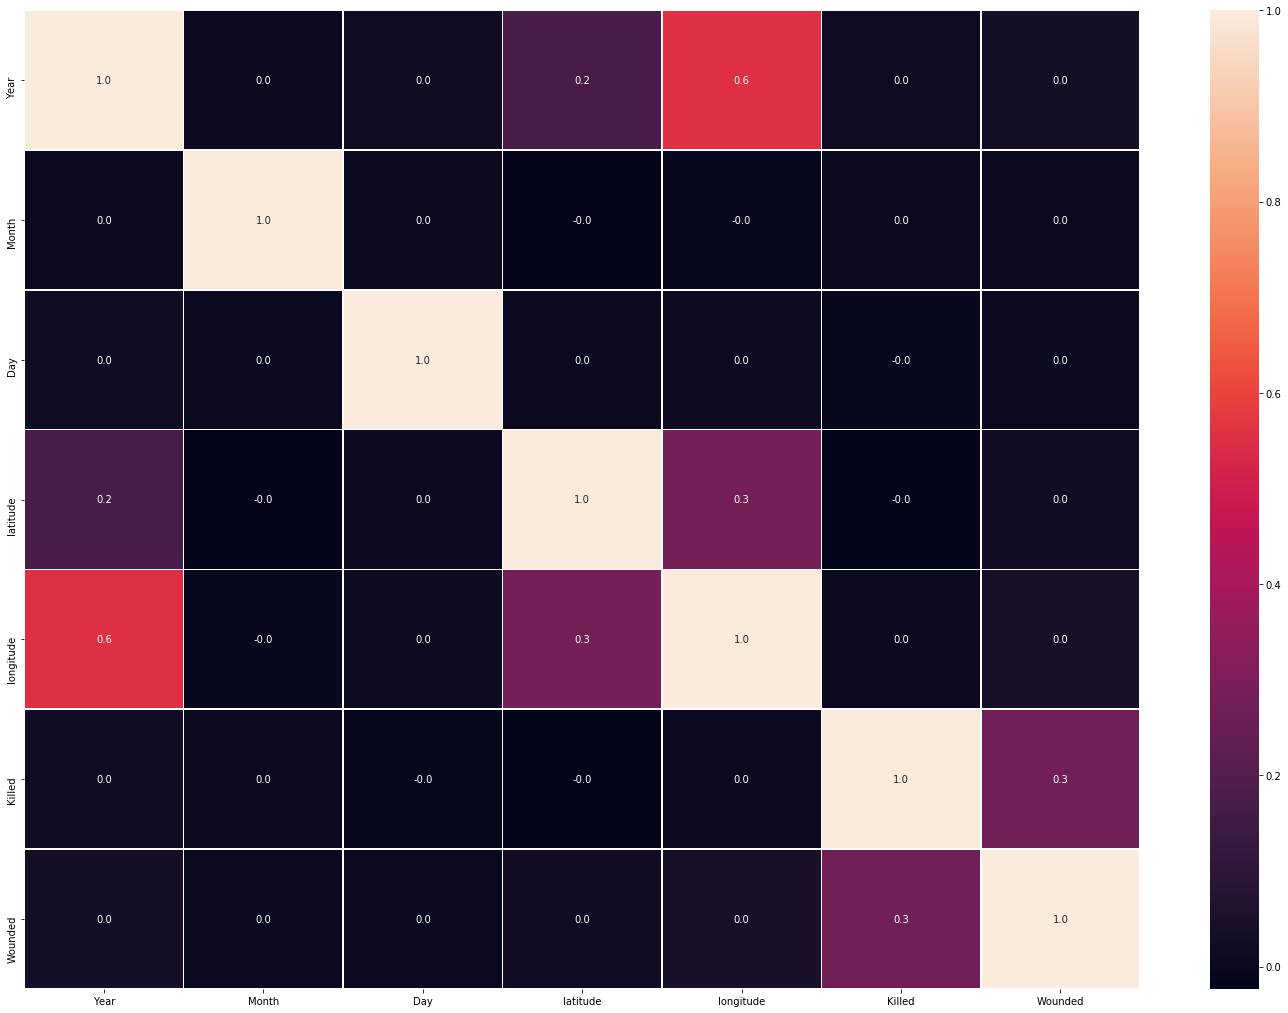

In [10]:
f,ax = plt.subplots(figsize=(25, 18))
sns.heatmap(data1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [15]:
data['Group'].value_counts().head(11) # Top groups

Unknown                                             71922
Taliban                                              5502
Shining Path (SL)                                    4548
Farabundo Marti National Liberation Front (FMLN)     3351
Islamic State of Iraq and the Levant (ISIL)          2833
Irish Republican Army (IRA)                          2670
Revolutionary Armed Forces of Colombia (FARC)        2474
New People's Army (NPA)                              2241
Al-Shabaab                                           2127
Basque Fatherland and Freedom (ETA)                  2024
Boko Haram                                           1839
Name: Group, dtype: int64

In [16]:
data1['Country'].value_counts().head()

Iraq           18770
Pakistan       12768
India           9940
Afghanistan     9690
Colombia        8077
Name: Country, dtype: int64

In [17]:
data1['Region'].value_counts().head()

Middle East & North Africa    40422
South Asia                    37841
South America                 18628
Western Europe                16020
Sub-Saharan Africa            13434
Name: Region, dtype: int64

In [19]:
print('Maximum people killed in an attack are: ',data1['Killed'].max(),'\nCountry:',data1.loc[data1['Killed'].idxmax()].Country)
print('Minimum people killed in an attack are: ',data1['Killed'].min(),'\nCountry:',data1.loc[data1['Killed'].idxmin()].Country) 

Maximum people killed in an attack are:  1500.0 
Country: Iraq
Minimum people killed in an attack are:  0.0 
Country: Mexico


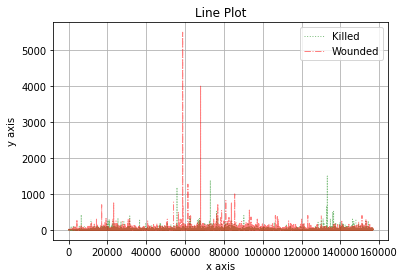

In [20]:
#Line Plot
data1.Killed.plot(kind='line',color='g',label='Killed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data1.Wounded.plot(color = 'r',label = 'Wounded',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

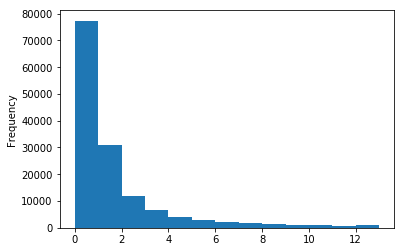

In [21]:
data1.Killed.plot(kind = 'hist',bins = 13,range= (0,13))

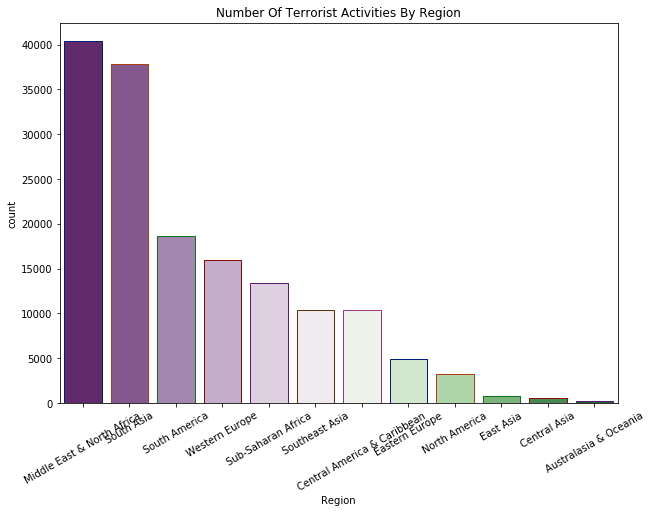

In [14]:
#Number Of Terrorist Activities By Region
plt.subplots(figsize=(10,7))
sns.countplot('Region',data=data,palette='PRGn',edgecolor=sns.color_palette('dark',7),order=data['Region'].value_counts().index)
plt.xticks(rotation=30)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

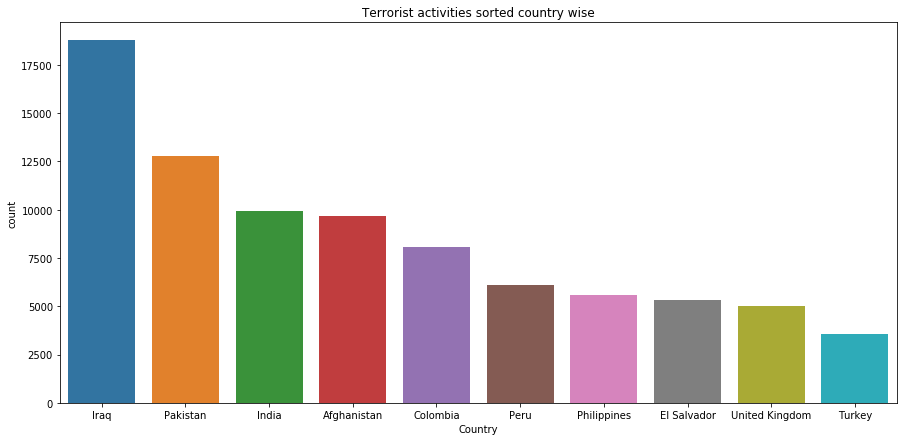

In [20]:
#
data1.head()
plt.subplots(figsize=(15,7))
sns.countplot('Country', data=data1, order=data1['Country'].value_counts()[:10].index)
plt.title('Terrorist activities sorted country wise')
plt.show()

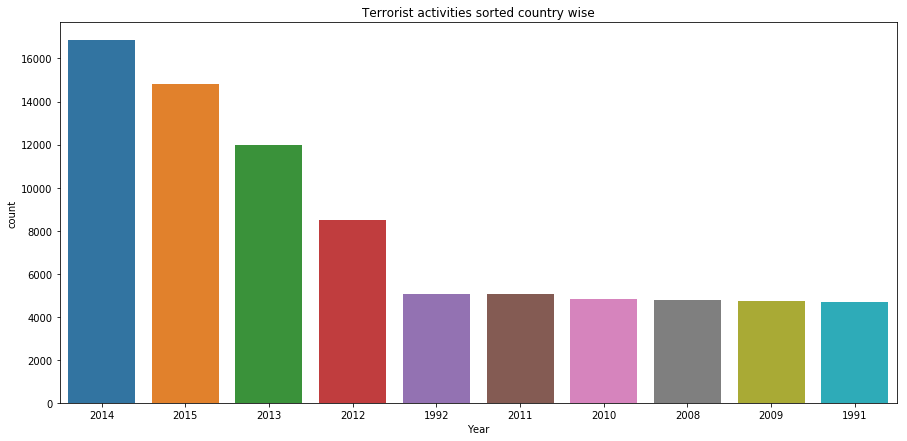

In [26]:
data1.head()
plt.subplots(figsize=(15,7))
sns.countplot('Year', data=data1, order=data1['Year'].value_counts()[:10].index)
plt.title('Terrorist activities sorted country wise')
plt.show()

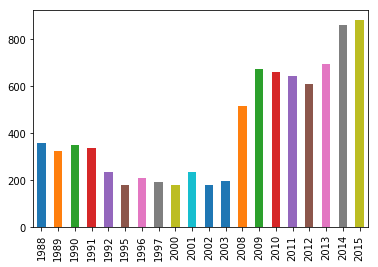

In [41]:
filter = data1['Country'] == "India"
d = data1[filter]
d = d['Year'].value_counts()[:20]
d.sort_index(ascending=True, inplace=True)
d.plot(kind='bar')
plt.show()

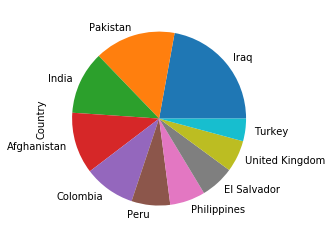

In [44]:
d = data1['Country'].value_counts()[:10]
d.plot(kind='pie')
plt.show()